# Data Preprocessing

### The goal of this Jupyter Notebook is to further clean and preprocess our data for machine learning applications down the line.

In [2]:
# import the necessary packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# import the dataset
df = pd.read_csv('Provider_Info.csv')
df.head(10)

,index,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,...,Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,0,015019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,P O BOX 130,ELMORE,AL,36025,3345678484,250,Elmore,...,24.0,22.667,0,1,1,$6692.00,0,1,130 ELMORE\r\nAL 36025\r\n,09/01/2016
1,1,015113,RIVER CITY CENTER,1350 FOURTEENTH AVENUE SOUTHEAST,DECATUR,AL,35601,2563556911,510,Morgan,...,40.0,48.667,0,3,1,$6045.00,0,1,"1350 FOURTEENTH AVENUE SOUTHEAST\r\nDECATUR, A...",09/01/2016
2,2,015112,MAGNOLIA HAVEN HEALTH AND REHABILITATION CENTER,603 WRIGHT STREET,TUSKEGEE,AL,36083,3347274960,430,Macon,...,16.0,15.333,0,0,0,$0.00,0,0,"603 WRIGHT STREET\r\nTUSKEGEE, AL 36083\r\n(32...",09/01/2016
3,3,015114,SHADESCREST HEALTH CARE CENTER,331 WEST 25TH STREET,JASPER,AL,35502,2053849086,630,Walker,...,52.0,25.333,0,3,1,$189763.00,0,1,"331 WEST 25TH STREET\r\nJASPER, AL 35502\r\n(3...",09/01/2016
4,4,015123,WASHINGTON COUNTY NURSING HOME,14600 ST STEPHENS AVENUE,CHATOM,AL,36518,2518476412,640,Washington,...,20.0,13.333,0,0,0,$0.00,0,0,"14600 ST STEPHENS AVENUE\r\nCHATOM, AL 36518\r...",09/01/2016
5,5,015115,"CORDOVA HEALTH AND REHABILITATION, LLC",70 HIGHLAND STREET WEST,CORDOVA,AL,35550,2054839282,630,Walker,...,24.0,32.667,0,0,0,$0.00,0,0,"70 HIGHLAND STREET WEST\r\nCORDOVA, AL 35550\r...",09/01/2016
6,6,015116,SIGNATURE HEALTHCARE OF WHITESBURG GARDENS,105 TEAKWOOD DRIVE SW,HUNTSVILLE,AL,35801,2568815000,440,Madison,...,4.0,52.000,0,1,0,$0.00,0,0,"105 TEAKWOOD DRIVE SW\r\nHUNTSVILLE, AL 35801\...",09/01/2016
7,7,015138,HENDRIX HEALTH AND REHABILITATION,1000 HIGHWAY 33,DOUBLE SPRINGS,AL,35553,2054892136,660,Winston,...,8.0,14.667,0,0,0,$0.00,0,0,"1000 HIGHWAY\r\nDOUBLE SPRINGS, AL 35553\r\n(3...",09/01/2016
8,8,015137,ALICEVILLE MANOR NURSING HOME,703 17TH STREET NORTHWEST,ALICEVILLE,AL,35442,2053736307,530,Pickens,...,8.0,5.333,0,0,0,$0.00,0,0,"703 17TH STREET NORTHWEST\r\nALICEVILLE, AL 35...",09/01/2016
9,9,015136,FALKVILLE HEALTH CARE CENTER,10 WEST 3RD STREET PO BOX 409,FALKVILLE,AL,35622,2567845291,510,Morgan,...,20.0,23.333,0,1,0,$0.00,0,0,"10 WEST 3RD STREET\r\nFALKVILLE, AL 35622\r\n(...",09/01/2016


In [4]:
df.shape

(15640, 82)

In [5]:
# Get a feel for the dataframe by understand what kind of information it entails
df.columns

Index(['index', 'Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Provider Phone Number', 'Provider SSA County Code',
       'Provider County Name', 'Ownership Type', 'Number of Certified Beds',
       'Number of Residents in Certified Beds', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid services',
       'Continuing Care Retirement Community', 'Special Focus Facility',
       'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating Footnote',
       'Staffing Rating', 'Staffing Rating Footnote', 'RN Staffing 

In [6]:
# subset the dataframe to contain only the columns that pertain to our question. 
wanted_columns = ['index','Federal Provider Number','Provider Name','Ownership Type', 'Number of Certified Beds',
       'Number of Residents in Certified Beds','Provider Type','Overall Rating','Health Inspection Rating','QM Rating','Staffing Rating','Reported CNA Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Adjusted CNA Staffing Hours per Resident per Day',
       'Adjusted LPN Staffing Hours per Resident per Day',
       'Adjusted RN Staffing Hours per Resident per Day',
       'Adjusted Total Nurse Staffing Hours per Resident per Day','Number of Facility Reported Incidents',
       'Number of Substantiated Complaints', 'Number of Fines',
       'Total Amount of Fines in Dollars', 'Number of Payment Denials',
       'Total Number of Penalties']

In [7]:
df = df[wanted_columns]
df.head(10)

,index,Federal Provider Number,Provider Name,Ownership Type,Number of Certified Beds,Number of Residents in Certified Beds,Provider Type,Overall Rating,Health Inspection Rating,QM Rating,...,Adjusted CNA Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
0,0,015019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,For profit - Corporation,124,102,Medicare and Medicaid,4.0,3.0,3.0,...,2.25231,1.08972,0.58208,3.81554,0,1,1,$6692.00,0,1
1,1,015113,RIVER CITY CENTER,For profit - Corporation,183,168,Medicare and Medicaid,1.0,1.0,4.0,...,1.68142,1.13755,0.56660,3.28225,0,3,1,$6045.00,0,1
2,2,015112,MAGNOLIA HAVEN HEALTH AND REHABILITATION CENTER,For profit - Corporation,77,77,Medicare and Medicaid,5.0,4.0,5.0,...,2.22270,0.99036,0.57752,3.72376,0,0,0,$0.00,0,0
3,3,015114,SHADESCREST HEALTH CARE CENTER,For profit - Corporation,107,96,Medicare and Medicaid,4.0,3.0,2.0,...,1.91886,1.89421,1.78070,5.53756,0,3,1,$189763.00,0,1
4,4,015123,WASHINGTON COUNTY NURSING HOME,Government - County,88,81,Medicare and Medicaid,4.0,4.0,4.0,...,3.28563,1.55005,0.49372,5.14766,0,0,0,$0.00,0,0
5,5,015115,"CORDOVA HEALTH AND REHABILITATION, LLC",For profit - Corporation,114,111,Medicare and Medicaid,2.0,2.0,3.0,...,2.66629,0.88093,0.38445,3.83348,0,0,0,$0.00,0,0
6,6,015116,SIGNATURE HEALTHCARE OF WHITESBURG GARDENS,For profit - Corporation,159,123,Medicare and Medicaid,2.0,1.0,4.0,...,2.41765,0.87616,0.58212,3.79660,0,1,0,$0.00,0,0
7,7,015138,HENDRIX HEALTH AND REHABILITATION,For profit - Corporation,110,96,Medicare and Medicaid,5.0,4.0,5.0,...,2.73275,1.27574,0.17528,3.93930,0,0,0,$0.00,0,0
8,8,015137,ALICEVILLE MANOR NURSING HOME,For profit - Corporation,100,79,Medicare and Medicaid,5.0,5.0,4.0,...,4.24746,1.61155,0.68762,6.35714,0,0,0,$0.00,0,0
9,9,015136,FALKVILLE HEALTH CARE CENTER,For profit - Corporation,116,102,Medicare and Medicaid,5.0,3.0,5.0,...,3.67022,1.09794,0.72610,5.39526,0,1,0,$0.00,0,0


### Cleaning the data for EDA:

In [8]:
# Check to see that the columns contain the right types of data
df.dtypes

index                                                                int64
Federal Provider Number                                             object
Provider Name                                                       object
Ownership Type                                                      object
Number of Certified Beds                                             int64
Number of Residents in Certified Beds                                int64
Provider Type                                                       object
Overall Rating                                                     float64
Health Inspection Rating                                           float64
QM Rating                                                          float64
Staffing Rating                                                    float64
Reported CNA Staffing Hours per Resident per Day                   float64
Reported LPN Staffing Hours per Resident per Day                   float64
Reported RN Staffing Hour

In [9]:
# Creating dictionary of columns that should be strings.
list_str = [1,2,3,6]

dict_str = {df.columns[column]: 'string' for column in list_str}

# Casting columns as int
df = df.astype(dict_str)
# Checking that changes were made
df.dtypes

index                                                                int64
Federal Provider Number                                             string
Provider Name                                                       string
Ownership Type                                                      string
Number of Certified Beds                                             int64
Number of Residents in Certified Beds                                int64
Provider Type                                                       string
Overall Rating                                                     float64
Health Inspection Rating                                           float64
QM Rating                                                          float64
Staffing Rating                                                    float64
Reported CNA Staffing Hours per Resident per Day                   float64
Reported LPN Staffing Hours per Resident per Day                   float64
Reported RN Staffing Hour

In [10]:
# converting the "Total Amount of Fines in Dollars" column from an object to floats
df = df.astype({'Total Amount of Fines in Dollars': 'string'})
df['Total Amount of Fines in Dollars'] = df['Total Amount of Fines in Dollars'].str.strip('$')
df = df.astype({'Total Amount of Fines in Dollars': 'float64'})
df.dtypes

index                                                                int64
Federal Provider Number                                             string
Provider Name                                                       string
Ownership Type                                                      string
Number of Certified Beds                                             int64
Number of Residents in Certified Beds                                int64
Provider Type                                                       string
Overall Rating                                                     float64
Health Inspection Rating                                           float64
QM Rating                                                          float64
Staffing Rating                                                    float64
Reported CNA Staffing Hours per Resident per Day                   float64
Reported LPN Staffing Hours per Resident per Day                   float64
Reported RN Staffing Hour

In [11]:
# make sure that the subsetted dataframe contains no duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15635    False
15636    False
15637    False
15638    False
15639    False
Length: 15640, dtype: bool

In [12]:
# take a quick overview of the stats of our observations.
df.describe()

,index,Number of Certified Beds,Number of Residents in Certified Beds,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported CNA Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,...,Adjusted CNA Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
count,15640.00000,15640.000000,15640.000000,15505.000000,15505.000000,15477.000000,15198.000000,15244.000000,15244.000000,15244.000000,...,15198.000000,15198.000000,15198.000000,15198.000000,15640.000000,15640.000000,15640.000000,1.564000e+04,15640.000000,15640.000000
mean,7819.50000,106.137020,86.185166,3.159755,2.815285,3.300575,3.230162,2.465328,0.850832,0.842519,...,2.492565,1.075705,0.577183,4.023112,1.026982,3.691816,0.331905,8.283463e+03,0.090345,0.422251
std,4515.02344,61.035294,54.177553,1.409355,1.286615,1.403705,1.156074,0.658932,0.423526,0.577666,...,0.684106,0.494145,0.311821,0.984204,2.759386,6.631363,0.729214,3.901729e+04,0.335406,0.904177
min,0.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.050910,...,0.000000,0.000000,0.043840,1.366790,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,3909.75000,64.000000,51.000000,2.000000,2.000000,2.000000,3.000000,2.071730,0.616265,0.541802,...,2.086460,0.794312,0.384155,3.427427,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,7819.50000,99.000000,78.000000,3.000000,3.000000,3.000000,3.000000,2.390050,0.825260,0.721255,...,2.404510,1.054905,0.511765,3.871520,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,11729.25000,128.000000,109.000000,4.000000,4.000000,5.000000,4.000000,2.776137,1.026953,0.973392,...,2.798703,1.313515,0.690312,4.428230,1.000000,5.000000,0.000000,0.000000e+00,0.000000,1.000000
max,15639.00000,1389.000000,757.000000,5.000000,5.000000,5.000000,5.000000,30.472220,15.077780,7.840000,...,32.766640,18.413210,5.935210,46.986430,96.000000,187.000000,10.000000,1.225900e+06,5.000000,13.000000


## Dealing with null values: 

In [13]:
df.isnull().sum()

index                                                                0
Federal Provider Number                                              0
Provider Name                                                        0
Ownership Type                                                       0
Number of Certified Beds                                             0
Number of Residents in Certified Beds                                0
Provider Type                                                        0
Overall Rating                                                     135
Health Inspection Rating                                           135
QM Rating                                                          163
Staffing Rating                                                    442
Reported CNA Staffing Hours per Resident per Day                   396
Reported LPN Staffing Hours per Resident per Day                   396
Reported RN Staffing Hours per Resident per Day                    396
Report

There seem to be a good number of null values present in our dataset. However, we cannot deal with these all in the same way. For a first step, since our analysis heavily depends on the three categories, Overall Rating, Health Inspection Rating, QM Rating, we cannot simply impute values in place of a null. For this reason, I have decided to drop these rows all together.

In [14]:
df[df['QM Rating'].isna()].head(10)

,index,Federal Provider Number,Provider Name,Ownership Type,Number of Certified Beds,Number of Residents in Certified Beds,Provider Type,Overall Rating,Health Inspection Rating,QM Rating,...,Adjusted CNA Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
53,53,04A326,"COLONEL GLENN HEALTH AND REHAB, LLC",For profit - Corporation,120,7,Medicaid,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0
154,154,155844,SYMPHONY OF CHESTERTON LLC,For profit - Corporation,70,2,Medicare and Medicaid,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,3,0,0.0,0,0
155,155,155846,GREEN HOUSE COTTAGES OF CARMEL,For profit - Corporation,72,3,Medicare and Medicaid,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0
183,183,165614,ROSE HAVEN NURSING HOME,For profit - Individual,58,50,Medicare and Medicaid,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0
228,228,175551,THE HEALTHCARE RESORT OF OLATHE,For profit - Corporation,70,2,Medicare and Medicaid,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0
252,252,185480,KINGS DAUGHTERS MEDICAL CENTER,Non profit - Corporation,10,2,Medicare and Medicaid,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0
418,418,225783,WHITTIER BRADFORD TRANSITIONAL CARE UNIT,For profit - Corporation,20,2,Medicare and Medicaid,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0
420,420,225782,BENCHMARK SNR LIVING AT THE COMMONS IN LINCOLN...,For profit - Partnership,32,6,Medicare,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0
454,454,235711,LAW-DEN NURSING HOME,For profit - Corporation,100,77,Medicare and Medicaid,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,2,2
455,455,235713,GENESYS SHORT-TERM REHABILITATION CENTER,Non profit - Church related,12,3,Medicare and Medicaid,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0


From a quick initial glance, we can see that in rows where all three categories, Overall Rating, Health Inspection Rating, and QM rating are null, most (if not all) of the values are missing as well. This further supports our decision to remove these rows all together. 

In [15]:
df = df[df['QM Rating'].notna()]

In [16]:
df.isnull().sum()

index                                                                0
Federal Provider Number                                              0
Provider Name                                                        0
Ownership Type                                                       0
Number of Certified Beds                                             0
Number of Residents in Certified Beds                                0
Provider Type                                                        0
Overall Rating                                                       0
Health Inspection Rating                                             0
QM Rating                                                            0
Staffing Rating                                                    294
Reported CNA Staffing Hours per Resident per Day                   293
Reported LPN Staffing Hours per Resident per Day                   293
Reported RN Staffing Hours per Resident per Day                    293
Report

In [17]:
df[df['Staffing Rating'].isna()].head(10)

,index,Federal Provider Number,Provider Name,Ownership Type,Number of Certified Beds,Number of Residents in Certified Beds,Provider Type,Overall Rating,Health Inspection Rating,QM Rating,...,Adjusted CNA Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties
62,62,065328,LONGMONT UNITED HOSPITAL T C U,Non profit - Corporation,15,6,Medicare,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0
90,90,115546,SAVANNAH SQUARE HEALTH CENTER,For profit - Corporation,40,38,Medicare,3.0,3.0,4.0,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0
100,100,125030,KAHUKU MEDICAL CENTER,Non profit - Other,6,8,Medicare and Medicaid,4.0,3.0,5.0,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0
117,117,145643,BLESSING HOSPITAL SNU,Non profit - Corporation,20,7,Medicare,3.0,4.0,1.0,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0,0
131,131,145953,PRAIRIEVIEW LUTHERAN HOME,Non profit - Corporation,27,22,Medicare and Medicaid,5.0,4.0,5.0,...,NaN,NaN,NaN,NaN,4,1,0,0.0,0,0
142,142,146173,"SPRINGS AT MONARCH LANDING, THE",For profit - Corporation,96,36,Medicare and Medicaid,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,0,1,0,0.0,0,0
166,166,165227,THE MADISON,For profit - Individual,90,67,Medicare and Medicaid,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,1,4,1,36628.0,0,1
180,180,165549,VISTA WOODS CARE CENTER,For profit - Corporation,60,57,Medicare and Medicaid,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,1,1,0,0.0,0,0
193,193,175146,HUTCHINSON REGIONAL MEDICAL CENTER INC (SNU),Non profit - Corporation,15,3,Medicare,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,0,0,0,0.0,1,1
226,226,175508,MAPLE HEIGHTS NURSING & REHABILITATION CENTER,Government - Federal,67,53,Medicare and Medicaid,3.0,3.0,4.0,...,NaN,NaN,NaN,NaN,0,5,0,0.0,0,0


As for the columns with no staffing rating, even though there are Overall and Health Inspection rating scores present, we are still unable to take advantage of these columns due to the lack of staffing hours reported. As we can see above, rows where staffing rating is null have null values for their staffing hours as well. As such, we will choose to remove these rows as well. 

In [18]:
df = df[df['Staffing Rating'].notna()]

In [19]:
df.isnull().sum()

index                                                              0
Federal Provider Number                                            0
Provider Name                                                      0
Ownership Type                                                     0
Number of Certified Beds                                           0
Number of Residents in Certified Beds                              0
Provider Type                                                      0
Overall Rating                                                     0
Health Inspection Rating                                           0
QM Rating                                                          0
Staffing Rating                                                    0
Reported CNA Staffing Hours per Resident per Day                   0
Reported LPN Staffing Hours per Resident per Day                   0
Reported RN Staffing Hours per Resident per Day                    0
Reported Licensed Staffing Hours p

Since there are only two null values remaining in the entire dataframe and it is only missing data from one metric, I chose to fill the null values with the mean.

In [20]:
mean_pt_hrs = df['Reported Physical Therapist Staffing Hours per Resident Per Day'].mean()
mean_pt_hrs

0.10152453000461122

In [21]:
df['Reported Physical Therapist Staffing Hours per Resident Per Day'].fillna(value=mean_pt_hrs, inplace=True)

In [22]:
df.isna().sum()

index                                                              0
Federal Provider Number                                            0
Provider Name                                                      0
Ownership Type                                                     0
Number of Certified Beds                                           0
Number of Residents in Certified Beds                              0
Provider Type                                                      0
Overall Rating                                                     0
Health Inspection Rating                                           0
QM Rating                                                          0
Staffing Rating                                                    0
Reported CNA Staffing Hours per Resident per Day                   0
Reported LPN Staffing Hours per Resident per Day                   0
Reported RN Staffing Hours per Resident per Day                    0
Reported Licensed Staffing Hours p

In [40]:
# Let's get a quick overview of our dataset before we proceed to creating dummy variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15183 entries, 0 to 15636
Data columns (total 27 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   index                                                            15183 non-null  int64  
 1   Federal Provider Number                                          15183 non-null  string 
 2   Provider Name                                                    15183 non-null  string 
 3   Ownership Type                                                   15183 non-null  string 
 4   Number of Certified Beds                                         15183 non-null  int64  
 5   Number of Residents in Certified Beds                            15183 non-null  int64  
 6   Provider Type                                                    15183 non-null  string 
 7   Overall Rating                          

In [41]:
df.shape

(15183, 27)

## Creating Dummy Variables:

When it comes to choosing important categorical variables to work with, two variables come to mind with this dataset: Ownership Type, and Provider Type. Before blindly turning them into dummy variables, we need to see how many unique inputs each one has.

In [23]:
df['Ownership Type'].value_counts()

For profit - Corporation                  8809
Non profit - Corporation                  2699
For profit - Partnership                  1031
For profit - Individual                    630
Non profit - Church related                563
Government - County                        526
Non profit - Other                         278
Government - Hospital district             222
Government - State                         136
For profit - Limited Liability company     101
Government - City/county                    96
Government - City                           82
Government - Federal                        10
Name: Ownership Type, dtype: Int64

In [24]:
df['Provider Type'].value_counts()

Medicare and Medicaid    14199
Medicare                   630
Medicaid                   354
Name: Provider Type, dtype: Int64

In [25]:
df_dummy = pd.get_dummies(df,columns=['Ownership Type','Provider Type'])

In [26]:
df_dummy.head(10)

,index,Federal Provider Number,Provider Name,Number of Certified Beds,Number of Residents in Certified Beds,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported CNA Staffing Hours per Resident per Day,...,Ownership Type_Government - County,Ownership Type_Government - Federal,Ownership Type_Government - Hospital district,Ownership Type_Government - State,Ownership Type_Non profit - Church related,Ownership Type_Non profit - Corporation,Ownership Type_Non profit - Other,Provider Type_Medicaid,Provider Type_Medicare,Provider Type_Medicare and Medicaid
0,0,015019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,124,102,4.0,3.0,3.0,4.0,2.12941,...,0,0,0,0,0,0,0,0,0,1
1,1,015113,RIVER CITY CENTER,183,168,1.0,1.0,4.0,3.0,1.56042,...,0,0,0,0,0,0,0,0,0,1
2,2,015112,MAGNOLIA HAVEN HEALTH AND REHABILITATION CENTER,77,77,5.0,4.0,5.0,4.0,2.20909,...,0,0,0,0,0,0,0,0,0,1
3,3,015114,SHADESCREST HEALTH CARE CENTER,107,96,4.0,3.0,2.0,5.0,1.94792,...,0,0,0,0,0,0,0,0,0,1
4,4,015123,WASHINGTON COUNTY NURSING HOME,88,81,4.0,4.0,4.0,4.0,3.06111,...,1,0,0,0,0,0,0,0,0,1
5,5,015115,"CORDOVA HEALTH AND REHABILITATION, LLC",114,111,2.0,2.0,3.0,3.0,2.72072,...,0,0,0,0,0,0,0,0,0,1
6,6,015116,SIGNATURE HEALTHCARE OF WHITESBURG GARDENS,159,123,2.0,1.0,4.0,4.0,2.63374,...,0,0,0,0,0,0,0,0,0,1
7,7,015138,HENDRIX HEALTH AND REHABILITATION,110,96,5.0,4.0,5.0,2.0,2.96615,...,0,0,0,0,0,0,0,0,0,1
8,8,015137,ALICEVILLE MANOR NURSING HOME,100,79,5.0,5.0,4.0,4.0,3.91139,...,0,0,0,0,0,0,0,0,0,1
9,9,015136,FALKVILLE HEALTH CARE CENTER,116,102,5.0,3.0,5.0,5.0,3.30784,...,0,0,0,0,0,0,0,0,0,1


## Standardizing the Data:

In [27]:
col_range = list(range(11,20))
df.iloc[:,col_range].describe()

,Reported CNA Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Adjusted CNA Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day
count,15183.000000,15183.000000,15183.000000,15183.000000,15183.000000,15183.000000,15183.000000,15183.000000,15183.000000
mean,2.464790,0.849750,0.838620,1.688370,4.153160,0.101525,2.491674,1.075099,0.576325
std,0.657165,0.420254,0.566376,0.712103,1.088525,0.133230,0.681996,0.492330,0.308789
min,0.000000,0.000000,0.050910,0.228000,1.520370,0.000000,0.000000,0.000000,0.043840
25%,2.071810,0.616480,0.541590,1.334280,3.538945,0.034300,2.086390,0.794395,0.384070
50%,2.389580,0.825000,0.720590,1.558060,3.976090,0.070290,2.404110,1.054900,0.511350
75%,2.775000,1.026055,0.971815,1.844390,4.540440,0.121660,2.797760,1.313260,0.689940
max,30.472220,15.077780,7.840000,20.788890,51.261110,3.320740,32.766640,18.413210,5.935210


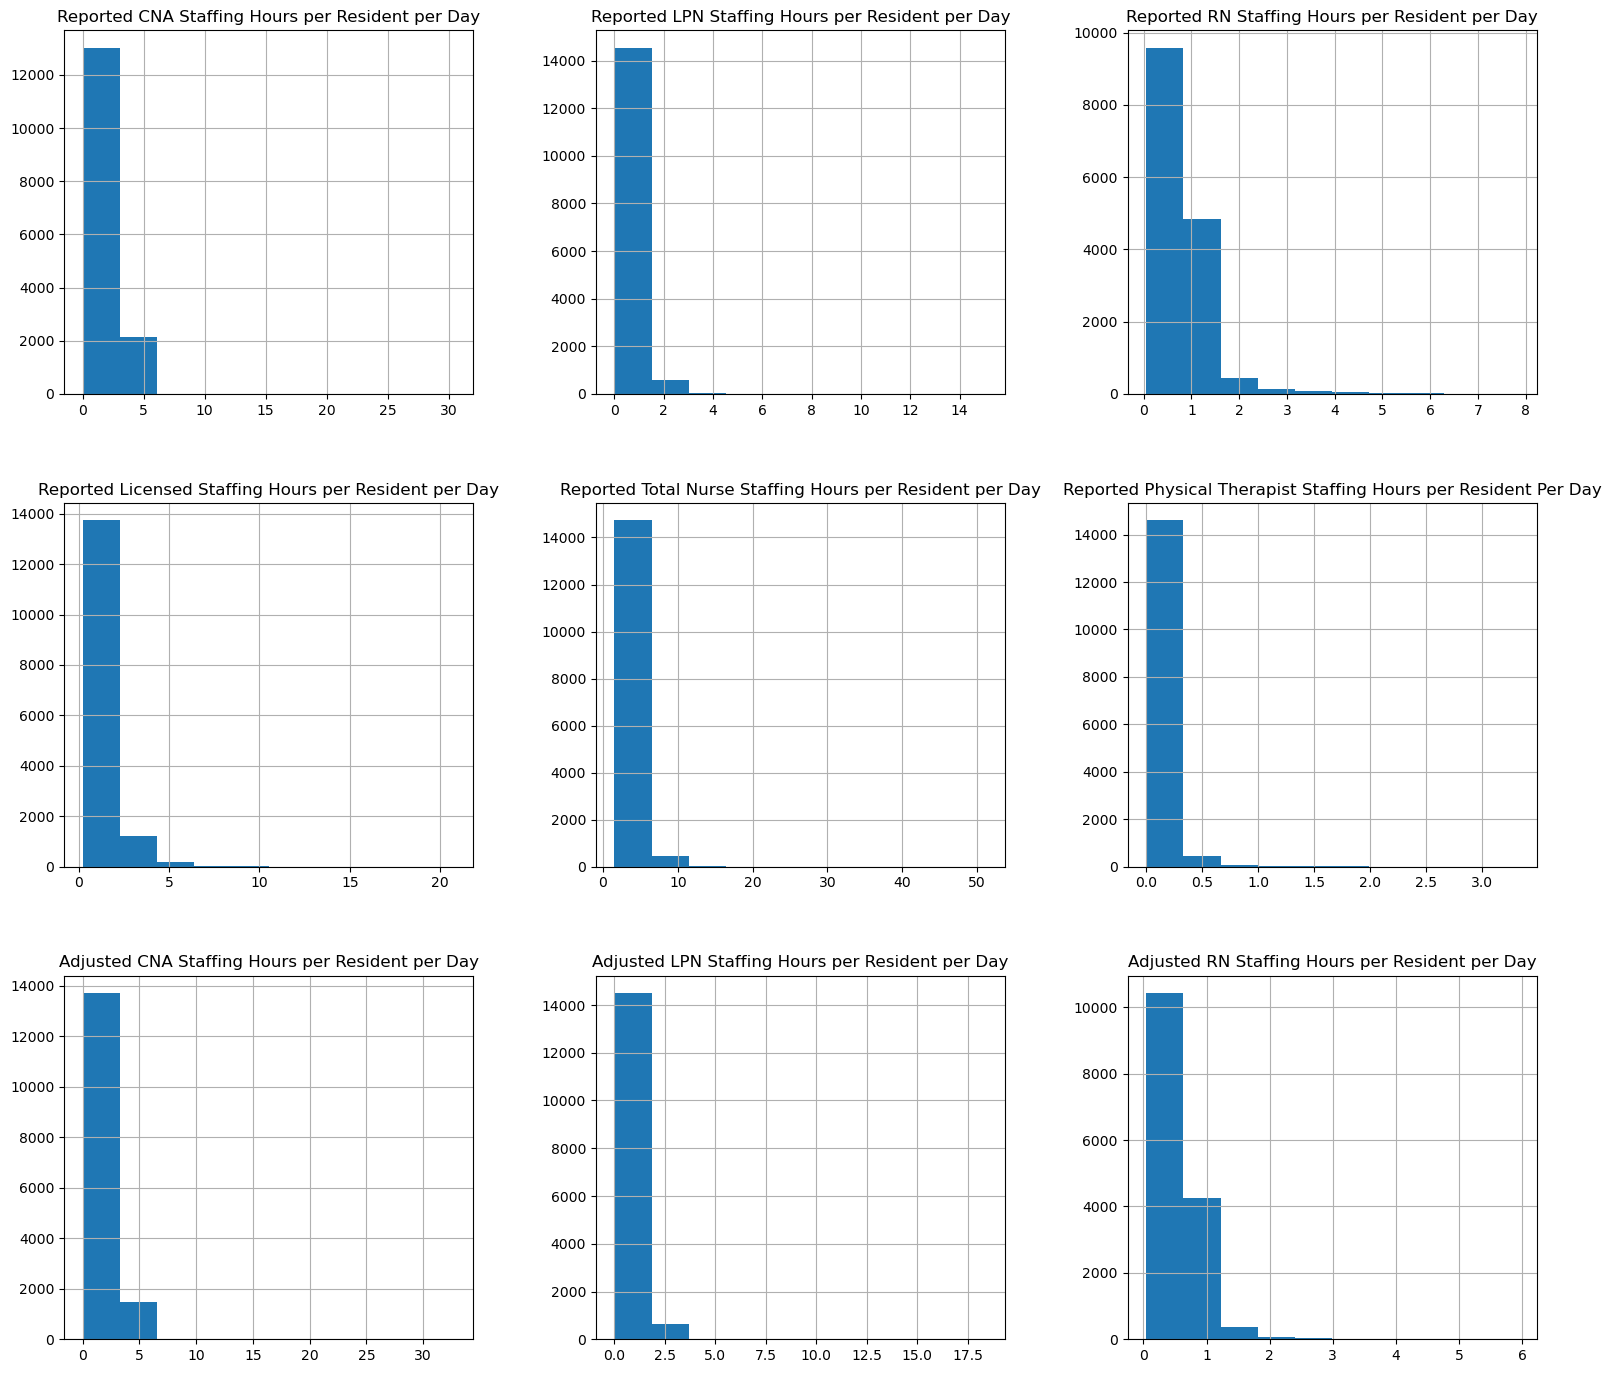

In [28]:
_ = df.iloc[:,col_range].hist(figsize=(19,17))

From a quick glance of our distributions, even though there are some outliers that lie far outside the mean, it would still be helpful to normalize our data. Since there are not a lot of outliers, I will choose to normalize the data instead of transforming it on a logarithmic scale. This will center our data around the mean and measure data points by their standard deviations about the mean instead.

In [29]:
SS_scaler = StandardScaler()

In [30]:
standard_cols = list(df.iloc[:,col_range].columns)

In [31]:
for col in standard_cols:
    # Fit SS_scaler to the data
    SS_scaler.fit(df_dummy[[col]])

    # Transform the data using the fitted scaler
    df_dummy[col] = SS_scaler.transform(df_dummy[[col]])

In [32]:
df_dummy.columns

Index(['index', 'Federal Provider Number', 'Provider Name',
       'Number of Certified Beds', 'Number of Residents in Certified Beds',
       'Overall Rating', 'Health Inspection Rating', 'QM Rating',
       'Staffing Rating', 'Reported CNA Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Adjusted CNA Staffing Hours per Resident per Day',
       'Adjusted LPN Staffing Hours per Resident per Day',
       'Adjusted RN Staffing Hours per Resident per Day',
       'Adjusted Total Nurse Staffing Hours per Resident per Day',
       'Number of Facility Reported Incidents',
       'Number of Substantiated Complaints', 'Number of Fines',
       'Total Amount of Fines in Dollars', 

In [33]:
# Checking to see that our columns were transformed
col_range = list(range(9,18))
df_dummy.iloc[:,col_range].head(10)

,Reported CNA Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Adjusted CNA Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day
0,-0.510360,-0.251357,-0.321793,-0.404280,-0.572591,-0.184383,-0.350986,0.029699,0.018640
1,-1.376214,0.052993,-0.041917,-0.002064,-0.832199,-0.040492,-1.188101,0.126853,-0.031493
2,-0.389108,-0.203360,-0.315843,-0.371222,-0.477763,-0.294122,-0.394405,-0.172124,0.003872
3,-0.786540,1.236246,2.391794,2.631910,1.246921,-0.687741,-0.839935,1.663801,3.900451
4,0.907444,0.520583,-0.572818,-0.148368,0.450781,-0.683313,1.164204,0.964734,-0.267520
5,0.389459,-0.417452,-0.628119,-0.745928,-0.252864,-0.623414,0.256046,-0.394401,-0.621399
6,0.257098,-0.293476,0.161488,-0.044756,0.125936,0.043501,-0.108543,-0.404090,0.018769
7,0.762940,0.527317,-1.060461,-0.532230,0.112413,-0.539196,0.353498,0.407548,-1.298810
8,2.201348,0.663264,-0.096123,0.314979,1.535054,-0.719267,2.574566,1.089654,0.360438
9,1.282902,-0.214045,0.104916,-0.042874,0.746466,-0.662671,1.728140,0.046396,0.485058


In [38]:
# Checking the shape of our final dataset before splitting in to test and train sets.
df_dummy.shape

(15183, 41)

## Splitting the Data into Training and Test Sets:

Since there are a few responding variables that we can use as metrics for success - namely overall rating, health inspection rating, and QM rating - we will split the data for each of those variables.

In [34]:
# Overall Rating focus
X_OR = df_dummy.drop('Overall Rating', axis=1).values
y_OR = df_dummy['Overall Rating'].values

X_OR_train, X_OR_test, y_OR_train, y_OR_test = train_test_split(X_OR, y_OR, test_size=0.4, random_state=0)

In [35]:
# Health Inspection focus
X_HI = df_dummy.drop('Health Inspection Rating', axis=1).values
y_HI = df_dummy['Health Inspection Rating'].values

X_HI_train, X_HI_test, y_HI_train, y_HI_test = train_test_split(X_HI, y_HI, test_size=0.4, random_state=0)

In [36]:
# QM Rating focus
X_QM = df_dummy.drop('QM Rating', axis=1).values
y_QM = df_dummy['QM Rating'].values

X_QM_train, X_QM_test, y_QM_train, y_QM_test = train_test_split(X_QM, y_QM, test_size=0.4, random_state=0)